In [141]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

In [47]:
tf.__version__

'2.8.0'

# Data

In [48]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Understanding The Data

In [49]:
nuniq=[]
isna=[]
uniq=[]
types=[]

for i in df.columns:
    nuniq.append(df[i].nunique())
    isna.append(df[i].isna().sum())
    uniq.append(df[i].unique())
    types.append(df[i].dtype)
    
describe=pd.DataFrame({'Column Type': types, 'NaN Values': isna, 'N Unique': nuniq, 'Unique Value':uniq}, index=df.columns)
describe

,Column Type,NaN Values,N Unique,Unique Value
RowNumber,int64,0,10000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
CustomerId,int64,0,10000,"[15634602, 15647311, 15619304, 15701354, 15737..."
Surname,object,0,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba..."
CreditScore,int64,0,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
Geography,object,0,3,"[France, Spain, Germany]"
Gender,object,0,2,"[Female, Male]"
Age,int64,0,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,int64,0,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,float64,0,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
NumOfProducts,int64,0,4,"[1, 3, 2, 4]"


* CustomerId: ID number of the customer
* Surname: Name of the customer
* CreditScore: Score of the credit
* Geography: Country origin of the customer
* Gender: Sex
* Age: How old the customer is
* Tenure: How long the customer become member of this bank
* Balance: Amount of money in customer's bank account at the time.
* NumOfProducts: The number of product's bank which customer use at the time.
* HasCrCard: Is customer has a credit card or not.
* IsActiveMember: Is customer is active member (It can be measured differently depend of what parameter are used to measure this, example: is customer using credit card?, is customer using his/her mobile banking?, etc.). 1 mean active, 0 mean inactive.
* EstimatedSalary: This isn't the actual salary of the customer, the bank estimate this value by using information from other columns.
* Exited: This column contain estimation of customers who are leave the bank (churn) or not. This column used to estimate who will churn in six months ahead. (Leave the bank (1) not leave the bank (0)).

Our task is to make segmentation model and tell the bank which of the customer at highest risk to leave the bank.

# Label Analysis

In [121]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

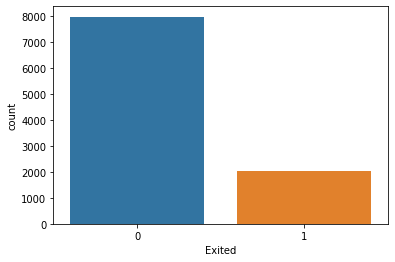

In [122]:
sns.countplot(df['Exited'])

# Artificial Neural Network (ANN) Without Pipeline

## Data Pre-Processing

In [76]:
y1=df['Exited']
x1=df.drop(columns=['CustomerId','RowNumber','Surname','Exited'], axis=1)

In [77]:
x1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [78]:
#Encode Gender
le = LabelEncoder()
x1['Gender'] = le.fit_transform(x1['Gender'])

In [79]:
#Encode Geography
transformer=ColumnTransformer(transformers=[('encoder',ce.OneHotEncoder(),['Geography'])],remainder='passthrough')

In [82]:
x1=np.array(transformer.fit_transform(x1))

In [83]:
print(x1)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [84]:
x_train1, x_test1, y_train1, y_test1= train_test_split(x1,y1, stratify=y1, test_size=0.2, random_state=0)

In [106]:
x_train1=StandardScaler().fit_transform(x_train1)
x_test1=StandardScaler().fit_transform(x_test1)

## Building The ANN

### Initializing The ANN

In [97]:
# Create a variabel which is ANN itself. This variabel ANN create as object of certain class, 
# and the certain class is the sequential class which allow exactly to build ANN but as sequence of layer as suppose to 
# a computational graph
ann = tf.keras.models.Sequential()
# Create this ANN variable which represent ANN created as an instance of that sequential class 
# which initialized are ANN as the sequence of layer (First Step)

### Adding the input layer and the first hidden layer

In [98]:
#units=how many neuron in dense is basically no rule of thumb, just experimentation (Experiment with different hyperparameter)
#activation=activation function, 'relu' is code for recitify function
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the second hidden layer

In [99]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

In [100]:
#units=how many neuron in output layer is based on what count of value we want to predict. In this case we only want the
#customer who churn/not churn, it means this ANN output only contain 1 value. Therefore units must be fill by 1 Neuron.
#activation= for this case we better use sigmoid activation, since it provide not only strict prediction, 
# it's also provide probability value of the prediction.
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Trainning The Artificial Neural Network (ANN)

### Compiling The ANN

In [101]:
#optimizer=choose the optimizer which can perform stochastic gradient descent, we choose adam optimizer
#loss=since this ANN has a purpose to predict binary classification we choose binary_crossentropy,
#if we predict more than binary we choose categorycol_crossentropy
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [165]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall()])

In [185]:
def ann_func():
    ann2=tf.keras.models.Sequential()
    ann2.add(tf.keras.layers.Dense(units=8,activation='relu'))
    ann2.add(tf.keras.layers.Dense(units=100,activation='relu'))
    ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
    ann2.compile(optimizer='adam', loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])
    return ann2

### Trainning The ANN

In [186]:
ann_func().fit(x_train1,y_train1, batch_size=50, epochs=200)

Epoch 1/200
160/160 [==============================] - 1s 1ms/step - loss: 0.5531 - recall_15: 0.0669
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4555 - recall_15: 0.0405
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4310 - recall_15: 0.1816
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4183 - recall_15: 0.2166
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4050 - recall_15: 0.2558
Epoch 6/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3905 - recall_15: 0.3086
Epoch 7/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3781 - recall_15: 0.3607
Epoch 8/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3674 - recall_15: 0.4092
Epoch 9/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3580 - recall_15: 0.4294
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3523

160/160 [==============================] - 0s 1ms/step - loss: 0.3152 - recall_15: 0.5209
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3147 - recall_15: 0.5166
Epoch 82/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3150 - recall_15: 0.5117
Epoch 83/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3147 - recall_15: 0.5147
Epoch 84/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3149 - recall_15: 0.5061
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3151 - recall_15: 0.5209
Epoch 86/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3148 - recall_15: 0.5067
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3144 - recall_15: 0.5135
Epoch 88/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3151 - recall_15: 0.5141
Epoch 89/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3142 - r

160/160 [==============================] - 0s 1ms/step - loss: 0.3075 - recall_15: 0.5233
Epoch 160/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3069 - recall_15: 0.5313
Epoch 161/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3070 - recall_15: 0.5215
Epoch 162/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3062 - recall_15: 0.5252
Epoch 163/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3058 - recall_15: 0.5313
Epoch 164/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3062 - recall_15: 0.5233
Epoch 165/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3062 - recall_15: 0.5270
Epoch 166/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3060 - recall_15: 0.5227
Epoch 167/200
160/160 [==============================] - 0s 1ms/step - loss: 0.3067 - recall_15: 0.5374
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 0

## Making the predictions and evaluating the models

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [187]:
#If we use activation function sigmoid the result will be in probability to the default
ann_func().predict(StandardScaler().fit_transform([[1, 0, 0, 600, 0, 40, 3, 60000, 2, 1, 1, 50000]]))

array([[0.5]], dtype=float32)

In [188]:
#If we add threshold value about probability we and we print it, we can get answer false.
print(ann_func().predict(StandardScaler().fit_transform([[1, 0, 0, 600, 0, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the test result

In [189]:
y_pred1 = ann_func().predict(x_test1)
y_pred1 = (y_pred1 > 0.5)
#print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

In [190]:
y_pred1

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [191]:
np.array(y_pred1).reshape(len(y_pred1),1)

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [192]:
print(np.concatenate((np.array(y_pred1).reshape(len(y_pred1),1), np.array(y_test1).reshape(len(y_test1),1)),1))

[[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


### Making the confusion metric

In [193]:
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
print(classification_report(y_test1, y_pred1))

[[ 373 1220]
 [  61  346]]
              precision    recall  f1-score   support

           0       0.86      0.23      0.37      1593
           1       0.22      0.85      0.35       407

    accuracy                           0.36      2000
   macro avg       0.54      0.54      0.36      2000
weighted avg       0.73      0.36      0.36      2000



# Artificial Neural Network (ANN) With Pipeline

## Data Pre-Processing

In [123]:
y2=df['Exited']
x2=df.drop(columns=['CustomerId','RowNumber','Surname','Exited'], axis=1)

In [124]:
x2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [126]:
transformer=ColumnTransformer([
    ('onehot',ce.OneHotEncoder(drop_invariant=True),['Geography', 'Gender']),
    ('scaler',RobustScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])
], remainder='passthrough')

In [127]:
x_model=transformer.fit_transform(x2)
x_model

array([[ 1.        ,  0.        ,  0.        , ...,  0.0117391 ,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.12551225,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.13962999,
         1.        ,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.59061507,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.07425228,
         1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.63020194,
         1.        ,  0.        ]])

In [128]:
x_train2, x_test2, y_train2, y_test2= train_test_split(x2,y2, stratify=y2, test_size=0.2, random_state=2020)

## Building ANN

In [149]:
def build_ann(a,b):
    ann2=tf.keras.models.Sequential()
    ann2.add(tf.keras.layers.Dense(units=6,activation='relu'))
    ann2.add(tf.keras.layers.Dense(units=6,activation='relu'))
    ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
    ann2.compile(optimizer='adam', loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])
    ann2.fit(a,b,epochs=100, batch_size=32)
    return ann2

In [132]:
#Import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [153]:
# Import Multi Layer Perceptron from Scikit-Learn
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier()

In [151]:
ann_pipe=Pipeline([
    ('transformer',transformer),
    ('model',build_ann())
])

TypeError: build_ann() missing 2 required positional arguments: 'a' and 'b'

In [152]:
ann_pipe.fit(x_train2,y_train2)

ValueError: The first argument to `Layer.call` must always be passed.

In [143]:
y_pred2=(ann_pipe.predict(x_test2)>0.5)

In [144]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.50      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.65      0.50      0.45      2000
weighted avg       0.74      0.80      0.71      2000



In [145]:
confusion_matrix(y_test2,y_pred2)

array([[1592,    1],
       [ 406,    1]], dtype=int64)